# Random Forest - Model Training

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

## Import Dataset

In [4]:
dataset = pd.read_csv('Dataset/CleanedExtractedFeatures.csv')

## Visualize Dataset

In [5]:
dataset.head()

,mean,std_dev,energy,entropy,num_peaks,lbp_0,lbp_1,ClassLabel
0,0.094581,0.058153,0.049309,1.097330,0.0,2,3,1
1,0.093970,0.051851,0.046076,1.178120,1.0,0,3,1
2,0.039831,0.020652,0.008052,1.217346,1.0,0,3,1
3,0.077550,0.050505,0.034259,1.115788,1.0,0,3,1
4,0.093627,0.051805,0.045799,1.178472,1.0,0,3,1


In [6]:
print(dataset.isnull().sum())

mean          0
std_dev       0
energy        0
entropy       0
num_peaks     0
lbp_0         0
lbp_1         0
ClassLabel    0
dtype: int64


## Seperate X-Y values, Train-Test values

In [7]:
X = dataset.drop(columns=['ClassLabel'])
Y = dataset['ClassLabel']

## Train the Model - Basics

### Train the Model

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50)

### Predict test set from the model and check accuracy

In [9]:
predict = model.predict(X_test)

In [10]:
accuracy_score(Y_test, predict)

0.46551724137931033

In [11]:
confusion_matrix(Y_test, predict)

array([[ 3,  3,  2,  8,  1],
       [ 0, 45,  1,  8,  1],
       [ 2,  0, 15, 13,  5],
       [ 9,  5,  7, 13,  6],
       [ 1,  1, 11,  9,  5]], dtype=int64)

In [12]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           1       0.20      0.18      0.19        17
           2       0.83      0.82      0.83        55
           3       0.42      0.43      0.42        35
           4       0.25      0.33      0.29        40
           5       0.28      0.19      0.22        27

    accuracy                           0.47       174
   macro avg       0.40      0.39      0.39       174
weighted avg       0.47      0.47      0.46       174



### Cross validation 

In [13]:
scores = cross_val_score(model, X, Y, cv=5) # 5-fold cross-validation

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.38793103 0.42241379 0.40517241 0.50434783 0.44347826]
Mean cross-validation score: 0.43266866566716644


## Train the Model - Finding the BEST Case

### No.of Decision Trees

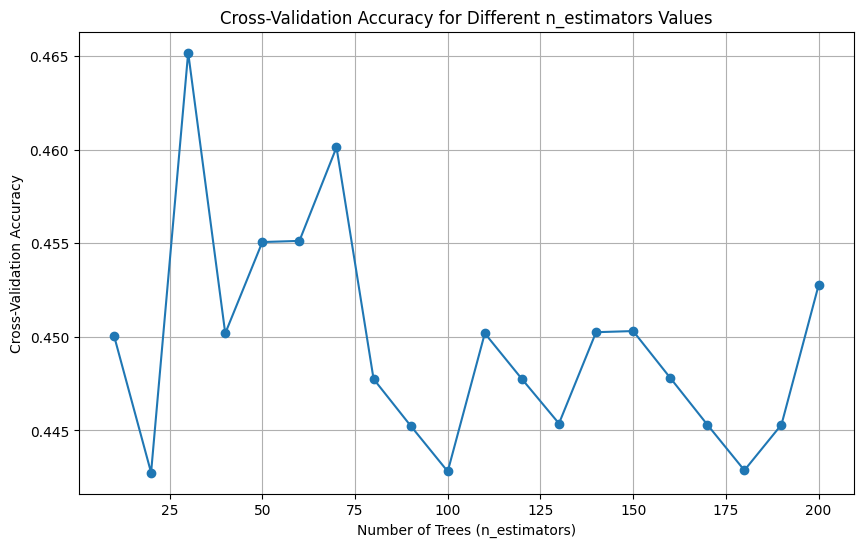

The optimal number of trees is 30 with cross-validation accuracy of 0.4652


In [17]:
n_estimators_range = range(10, 201, 10)  # n_estimators: DECISION TREES
cross_validation_scores = []

for n_estimator in n_estimators_range:
    modelRF = RandomForestClassifier(n_estimators=n_estimator, random_state=42)
    scores = cross_val_score(modelRF, X_train, Y_train, cv=10)  # 10-fold cross validation
    cross_validation_scores.append(scores.mean()) # Mean cross-validation score

# Plot the cross-validation accuracy against n_estimators values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cross_validation_scores, marker='o')
plt.title('Cross-Validation Accuracy for Different n_estimators Values')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()

# Find and print the optimal n_estimators value
optimal_n_estimators = n_estimators_range[np.argmax(cross_validation_scores)]
print(f"The optimal number of trees is {optimal_n_estimators} with cross-validation accuracy of {max(cross_validation_scores):.4f}")

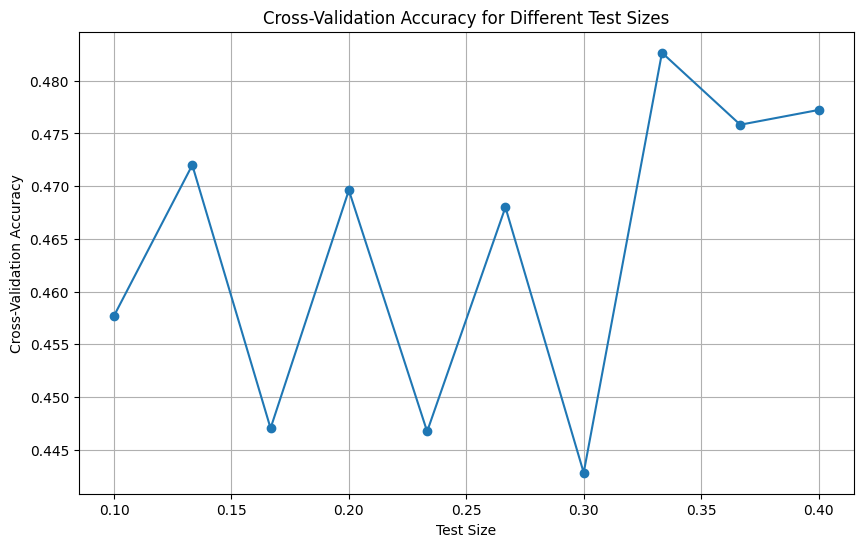

The optimal test size is 0.33 with cross-validation accuracy of 0.4827


In [20]:
# Define the range of test sizes to evaluate
test_sizes = np.linspace(0.1, 0.4, 10)
test_size_list= []

for test_size in test_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    modelRF = RandomForestClassifier(n_estimators=100, random_state=42)
    scores = cross_val_score(modelRF, X_train, Y_train, cv=10)  # 10-fold cross validation
    test_size_list.append(scores.mean()) # Mean cross-validation score

# Plot the cross-validation accuracy against test sizes
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, test_size_list, marker='o')
plt.title('Cross-Validation Accuracy for Different Test Sizes')
plt.xlabel('Test Size')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()

# Find and print the optimal test size
optimal_test_size = test_sizes[np.argmax(test_size_list)]
print(f"The optimal test size is {optimal_test_size:.2f} with cross-validation accuracy of {max(test_size_list):.4f}")